In [65]:
path = '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots'

In [66]:
import glob,re

In [89]:
files = glob.glob('%s/out_20171130_17*node_*transformed_MX/cat_opt.json' % path)

In [90]:
files

['/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171130_171610_node_SM_transformed_MX/cat_opt.json']

In [91]:
import json 
import numpy as np

#summary = { x:[] for x in ['node','boundaries','ncat','fom','selections']  }
summary = { x:[] for x in ['node','boundaries','ncat','fom']  }


for fil in files:
    name = fil.split('/')[-2].split('node_')[-1]
    if name == 'SM_transformed_MX': name = '0'
    node = int(name.replace('_transformed_MX',''))
    with open(fil) as fin:
        info = json.loads(fin.read())
        fin.close()
    for key,val in info.items():
        val['node'] = node
        val['boundaries'] = np.array(val['boundaries'])
#        val['selections'] = np.array(val['selections'])
        for col in summary.keys():
            summary[col].append( val[col] )

# print(summary)
    

In [92]:
import pandas as pd
df = pd.DataFrame(summary)

In [93]:
df.set_index(['ncat','node'],drop=False,inplace=True)

In [94]:
df.sort_index(inplace=True)
df

,,boundaries,fom,ncat,node
ncat,node,,,,
3,0,"[800.0, 439.221, 359.832, 293.559]",-4.974,3,0


In [100]:
from sklearn.cluster import KMeans

In [101]:
boundaries = []

for ncats in [3]:
    boundaries.append( np.vstack(df.loc[ncats,'boundaries'].values.tolist()).ravel() )

In [102]:
boundaries = np.hstack(boundaries).ravel()

In [103]:
filtered=boundaries[(boundaries > 260)]
#filtered_2=boundaries[(boundaries > 260) & (boundaries < 800)]
#filtered = boundaries

[ 250.     293.559  359.832  439.221]


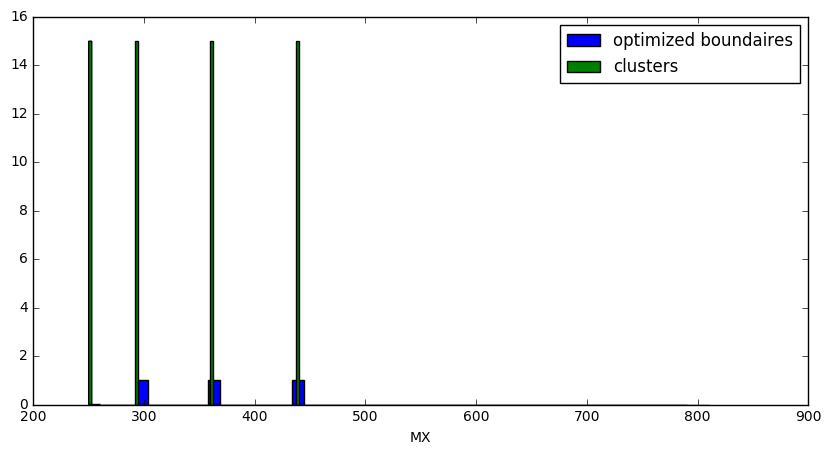

[ 250.      326.6955  439.221 ]


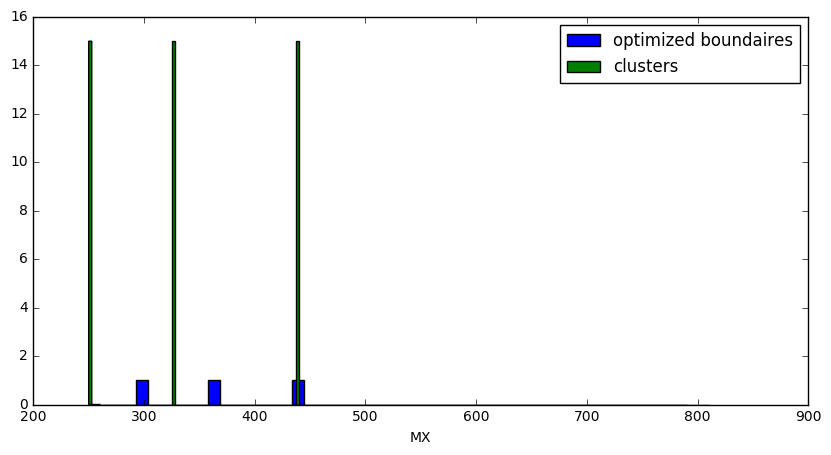

In [106]:
import matplotlib.pyplot as plt
for n_clusters in [3,2]:
    plt.figure(figsize=(10,5))
    plt.hist(boundaries,bins=50,range=[250,790],label="optimized boundaires");
#     kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
#     kmeans.fit(filtered_2.reshape(-1,1))
#     centers = np.array(kmeans.cluster_centers_.ravel().tolist()+[250,800]) 
#     plt.hist(centers,bins=200,range=[250,800],weights=40.*np.ones_like(centers));

    kmeans = KMeans(init='k-means++', n_clusters=n_clusters+1, n_init=10)
    kmeans.fit(filtered.reshape(-1,1))
    centers = np.array([250]+kmeans.cluster_centers_.ravel().tolist())
    centers.sort()
    centers=centers[:-1]
    plt.hist(centers,bins=200,range=[250,810],weights=15.*np.ones_like(centers),label="clusters");
    plt.xlabel("MX")
    print(centers)
    
#     kmeans = KMeans(init='k-means++', n_clusters=n_clusters+2, n_init=10)
#     kmeans.fit(boundaries.reshape(-1,1))
#     centers = kmeans.cluster_centers_.ravel() 
#     plt.hist(centers,bins=200,range=[250,800],weights=30.*np.ones_like(centers));
    plt.legend()
    plt.show()